In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def wazir_train_data_normalize(x,y):
    x=tf.cast(x,tf.float32)/255.0
    y=tf.cast(y,tf.int64)
    return x,y

In [4]:
(wazirx_train,waziry_train),(wazirx_test,waziry_test)=tf.keras.datasets.mnist.load_data()

In [5]:
def show_img(img):
  #plt.figure()
  plt.imshow(img)
  #plt.colorbar()
  plt.show()

In [6]:
#show_img(wazirx_train[0])
print(waziry_train[0])

5


In [7]:
def create_slices(x,y):
    ds = tf.data.Dataset.from_tensor_slices((x,y))
    ds = ds.map(wazir_train_data_normalize)
    ds = ds.shuffle(len(x)).batch(128)
    return ds

In [8]:
def get_model():
  
    model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  
    model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])
    return model

In [9]:
model=get_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
__________________________________________________

In [11]:
db_train = create_slices(wazirx_train,waziry_train)
db_test = create_slices(wazirx_test,waziry_test)

In [12]:
model.fit(db_train,epochs=10)

Train for 469 steps
Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3200 - accuracy: 0.9030
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2163 - accuracy: 0.9377
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2035 - accuracy: 0.9416
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1871 - accuracy: 0.9465
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1741 - accuracy: 0.9513
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1698 - accuracy: 0.9538
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1701 - accuracy: 0.9539
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1659 - accuracy: 0.9551
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1613 - accuracy: 0.9555
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.159

In [13]:
model.evaluate(db_test)

79/79 [==============================] - 0s 4ms/step - loss: 0.1466 - accuracy: 0.9655


[0.14656498368027843, 0.9655]

In [14]:
x=wazirx_train[5]
#show_img(x)
print(waziry_train[5])
x.shape

2


(28, 28)

In [15]:
val=model.predict(x.reshape((1,28,28)))
np.argmax(val)

2

In [16]:
img=plt.imread('image.png')

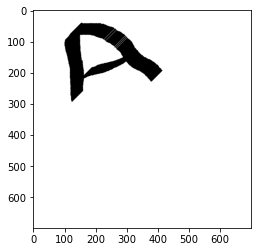

In [17]:
show_img(img)

In [18]:
img.shape

(700, 700, 3)

In [19]:
img2=tf.image.rgb_to_grayscale(img)
img2.shape

TensorShape([700, 700, 1])

In [20]:
img3=tf.image.resize(img2,(28,28),preserve_aspect_ratio=True)
img3.shape

TensorShape([28, 28, 1])

In [21]:
img3=np.squeeze(img3)
img3.shape

(28, 28)

In [22]:
img3,img3y=wazir_train_data_normalize(img3,img3)

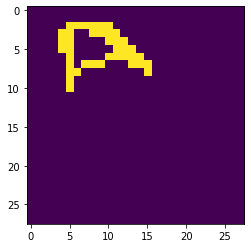

In [23]:
plt.imshow(1-img3)


In [24]:
img3=np.squeeze(img3)
img3.shape

(28, 28)

In [25]:
img4=1-img3.reshape((1,28,28))
img4.shape

(1, 28, 28)

In [26]:
val=model.predict(x.reshape((1,28,28)))
np.argmax(val)

2

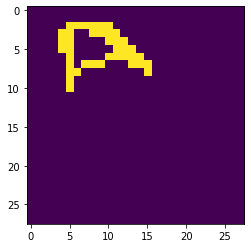

In [27]:
plt.imshow(img4[0])